# Telecom Customer Churn Analysis

# Submitted by Akshay Danthi and Uttam Gogineni

# MS Business Analytics - MSBA 326 Final Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset and preview the first few rows

In [2]:
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_data = pd.read_csv(file_path)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Data types and summary of numerical features

In [3]:
data_info = churn_data.info()
statistical_summary = churn_data.describe()
data_info, statistical_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
        SeniorCitizen       tenure  MonthlyCharges        Churn
 count    7043.000000  7043.000000     7043.000000  7043.000000
 mean        0.162147    32.371149       64.761692     0.265370
 std         0.368612    24.559481       30.090047     0.441561
 min         0.000000     0.000000       18.250000     0.000000
 25%         0.000000     9.000000       35.500000     0.000000
 50%         0.000000    29.000000       70.350000     0.000000
 75%         0.000000    55.000000       89.850000     1.000000
 max         1.000000    72.000000      118.750000     1.000000)

## Data Cleaning

In [4]:
# TotalCharges column has been identified as object dType by Pandas. Hence, changing it to a numerical column.

churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data['TotalCharges'].fillna(0, inplace=True)
churn_data['TotalCharges'].isnull().sum()

0

## Visualizations

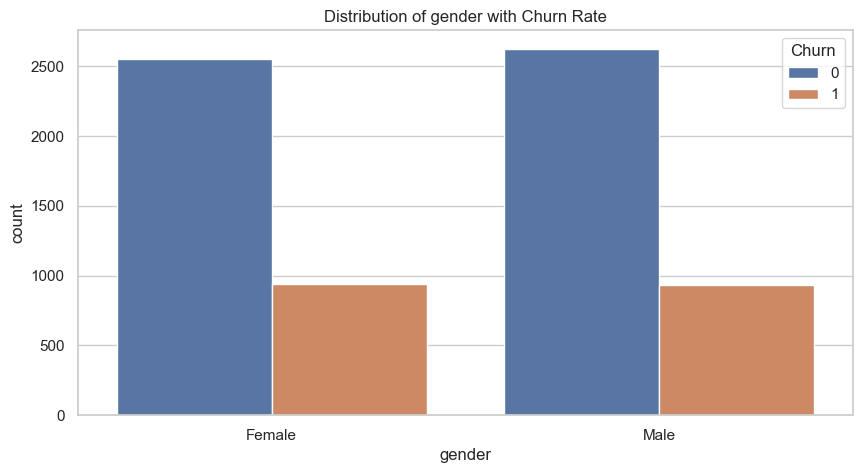

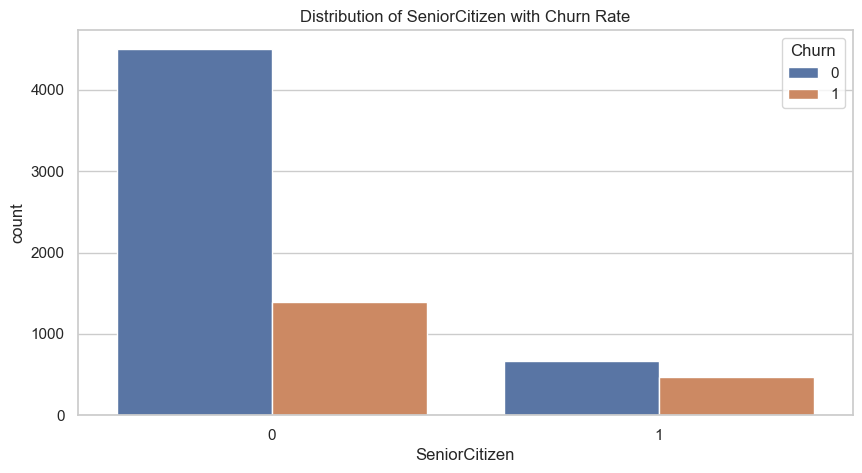

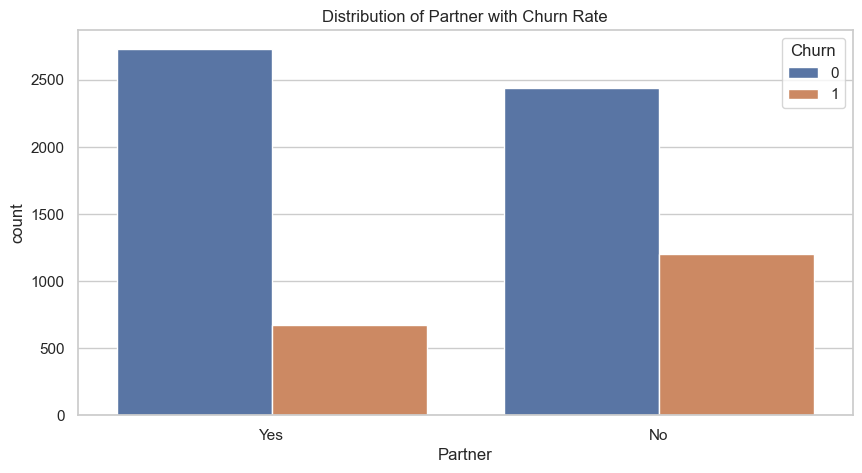

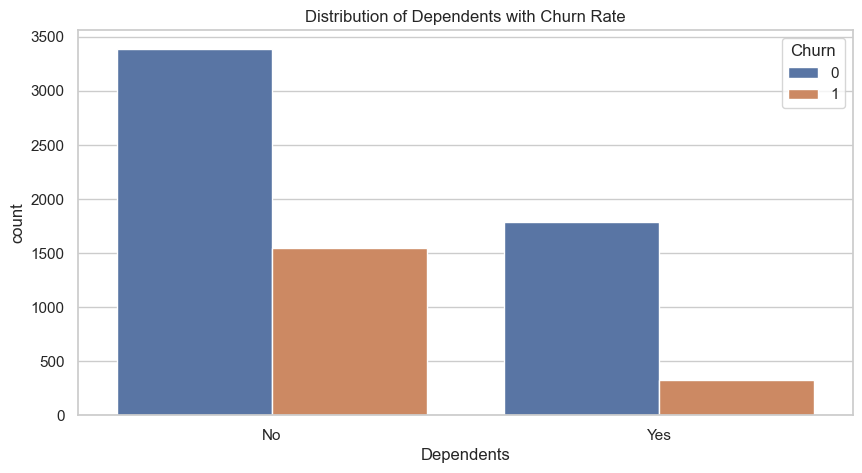

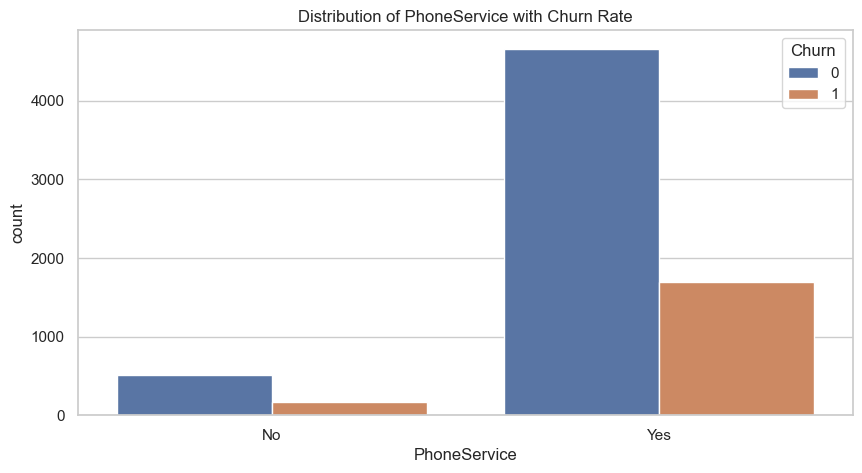

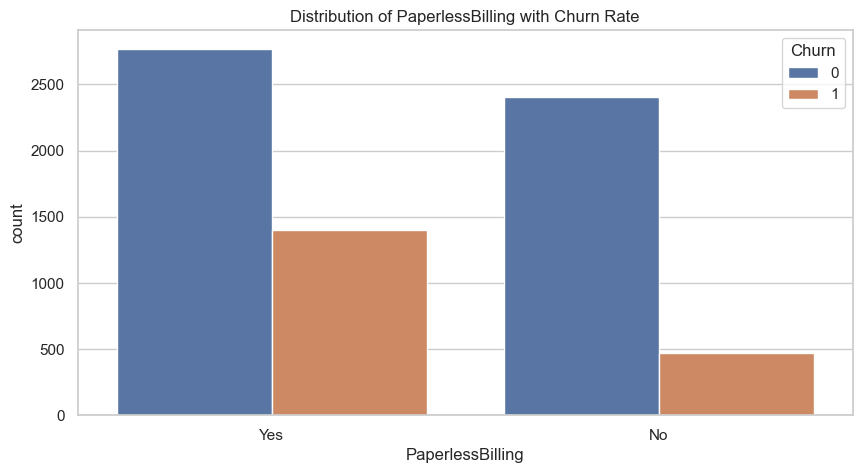

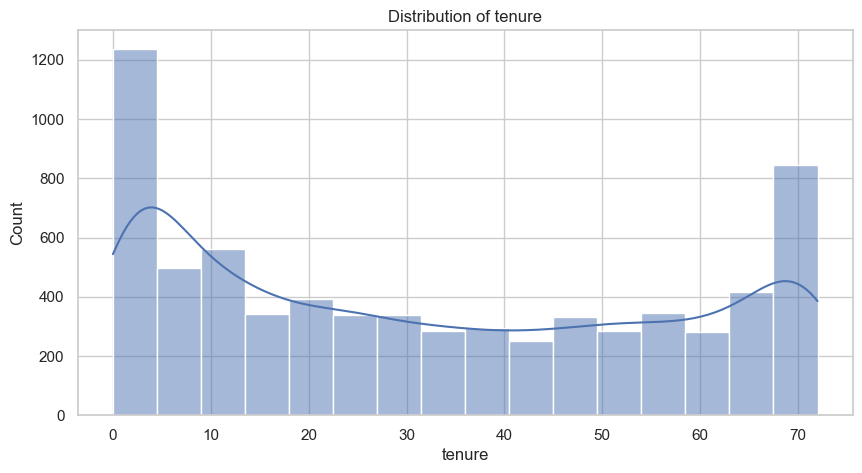

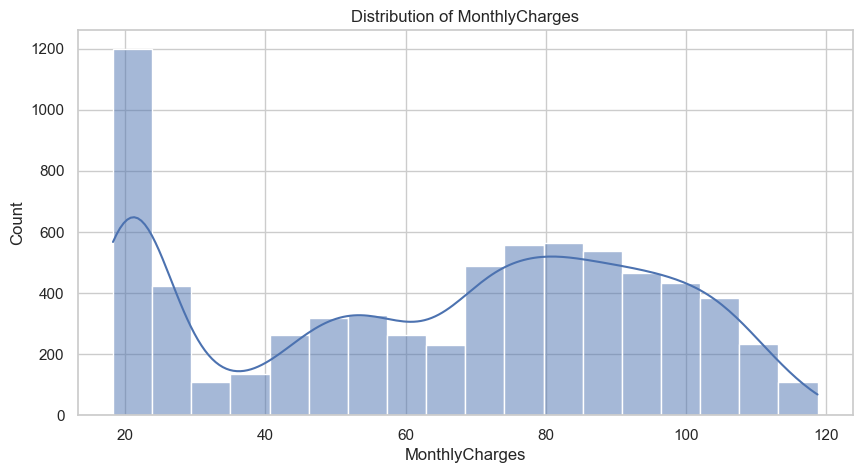

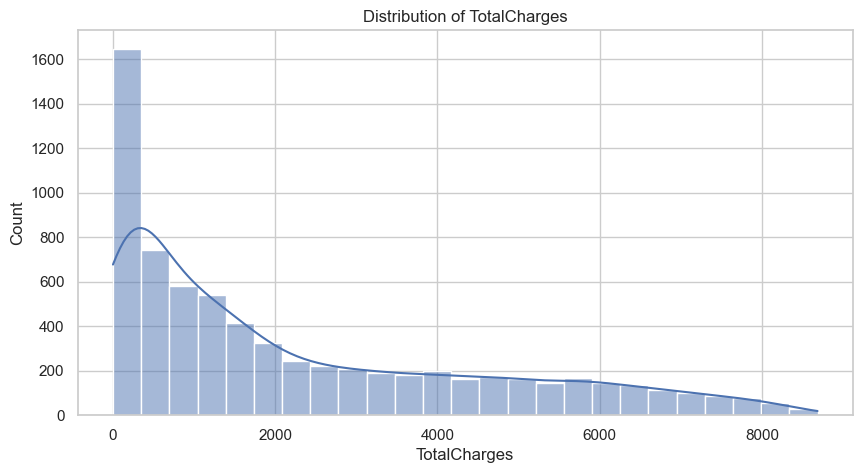

In [5]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Define a function to create count plots for categorical columns
def plot_categorical_columns(data, col, target):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue=target, data=data)
    plt.title(f'Distribution of {col} with Churn Rate')
    plt.show()

# Define a function to create distribution plots for numerical columns
def plot_numerical_columns(data, col):
    plt.figure(figsize=(10,5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting categorical columns with churn rate
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in categorical_columns:
    plot_categorical_columns(churn_data, col, 'Churn')

# Plotting distribution of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_columns:
    plot_numerical_columns(churn_data, col)

## Scatter Plots

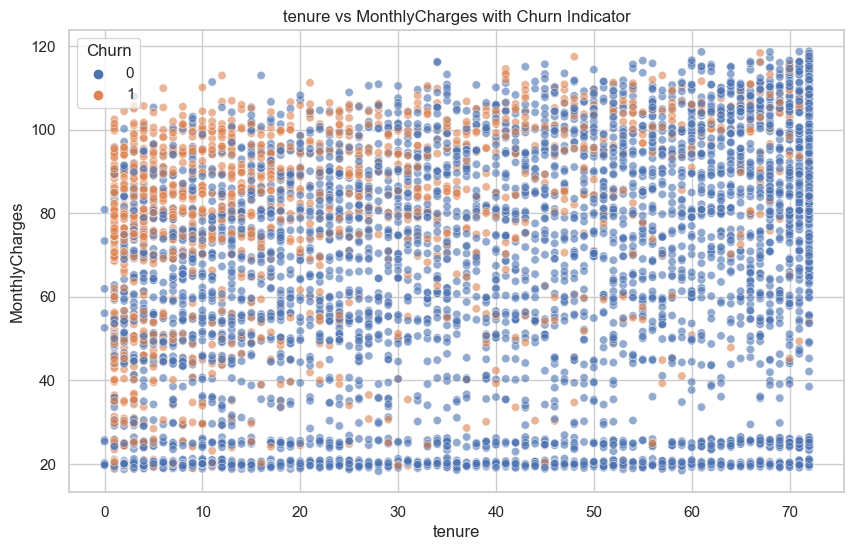

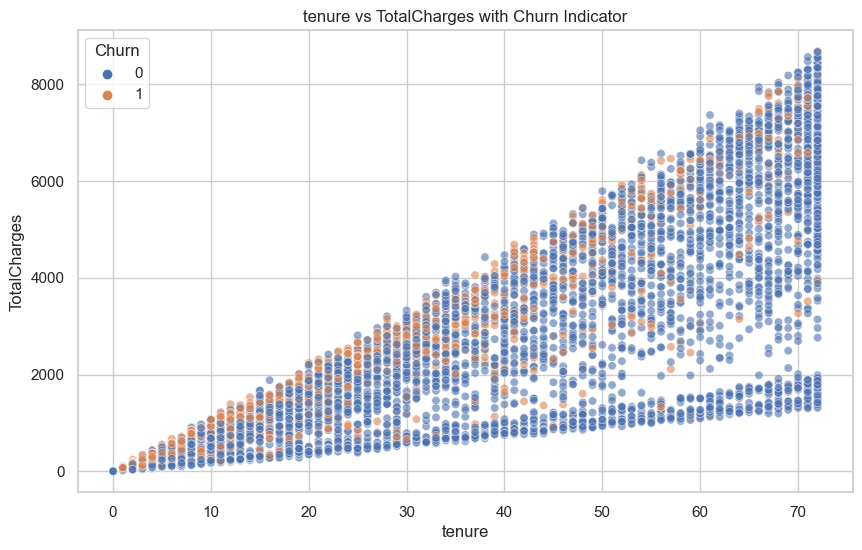

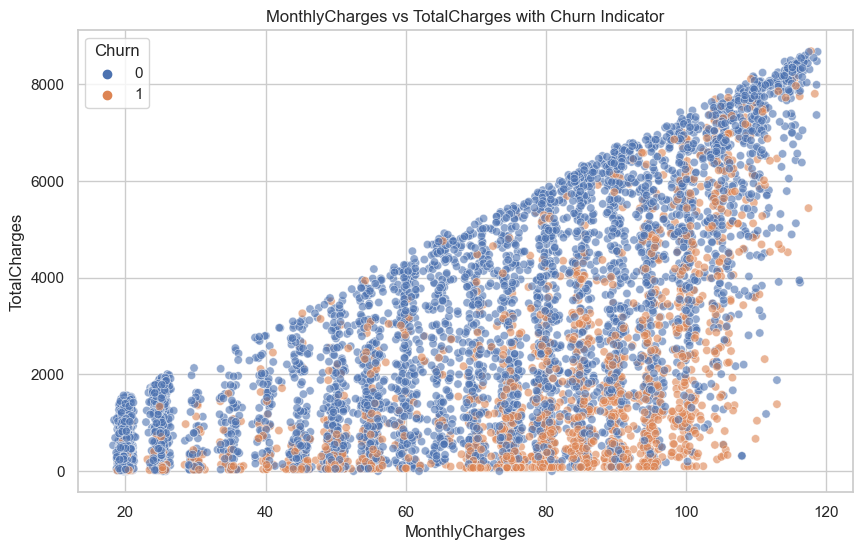

In [6]:
# Define a function to create scatter plots for numerical columns against churn
def plot_scatter(data, x_col, y_col):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=x_col, y=y_col, data=data, hue='Churn', alpha=0.6)
    plt.title(f'{x_col} vs {y_col} with Churn Indicator')
    plt.show()

# Scatter plots of MonthlyCharges and TotalCharges against tenure
plot_scatter(churn_data, 'tenure', 'MonthlyCharges')
plot_scatter(churn_data, 'tenure', 'TotalCharges')

# Scatter plot of MonthlyCharges against TotalCharges
plot_scatter(churn_data, 'MonthlyCharges', 'TotalCharges')

## Correlation Matrix

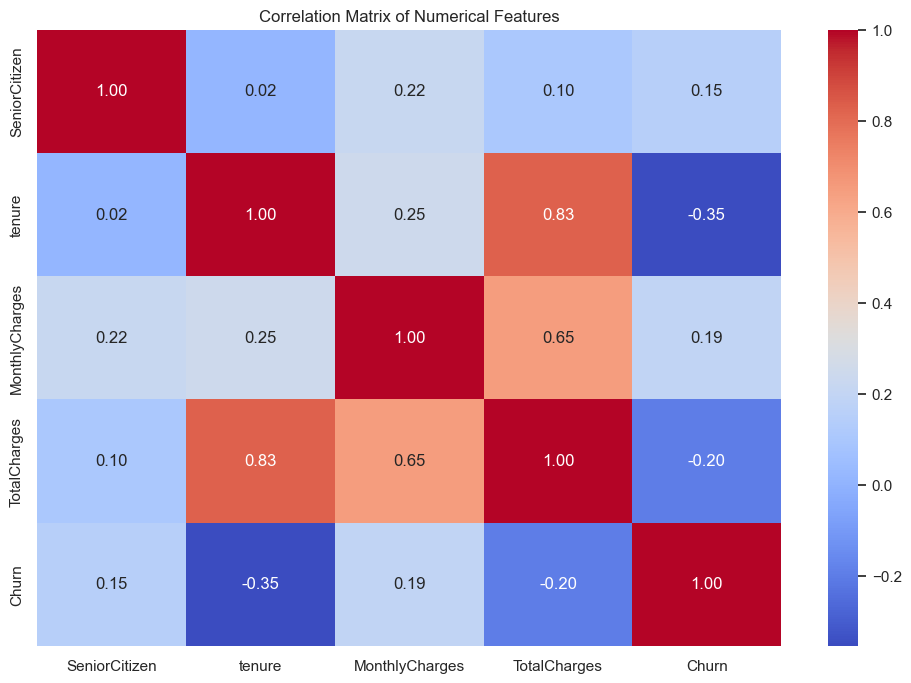

In [7]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = churn_data.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Classification Rules for Financial Status
Customers are classified into `CustFinancialStatus` categories ("Lower Income", "Middle Class", "Upper Class") based on services they use and their payment method. The rules prioritize the `PaymentMethod` column as follows:

1. If `PaymentMethod` is "Electronic check", then classify as "Middle Class".
2. If `PaymentMethod` is "Mailed check", then classify as "Lower Income".
3. If `PaymentMethod` is "Bank transfer (automatic)" or "Credit card (automatic)", then classify as "Upper Class".
4. If `Contract` is "Two year", classify as "Upper Class" unless already classified by `PaymentMethod`.
5. If a customer has multiple premium services and is not already classified as "Upper Class" by `PaymentMethod`, classify as "Middle Class".
6. If a customer has minimal services, classify as "Lower Income".


In [8]:
def classify_cust_financial_status(row):
    if row['PaymentMethod'] == 'Electronic check':
        return 'Middle Class'
    elif row['PaymentMethod'] == 'Mailed check':
        return 'Lower Income'
    elif row['PaymentMethod'] in ['Bank transfer (automatic)', 'Credit card (automatic)']:
        return 'Upper Class'
    else:
        if row['Contract'] == 'Two year':
            return 'Upper Class'
        elif row['Contract'] == 'Month-to-month':
            premium_services = ['MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
            premium_count = sum(row[service] == 'Yes' for service in premium_services)
            premium_threshold = 3
            if premium_count >= premium_threshold:
                return 'Middle Class'
            else:
                return 'Lower Income'
        else:
            premium_services = ['MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
            premium_count = sum(row[service] == 'Yes' for service in premium_services)
            premium_threshold = 2
            if premium_count >= premium_threshold:
                return 'Middle Class'
            else:
                return 'Lower Income'

# Apply the classification function to the dataset
churn_data['CustFinancialStatus'] = churn_data.apply(classify_cust_financial_status, axis=1)
churn_data[['PaymentMethod', 'Contract', 'MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'CustFinancialStatus']].head()

,PaymentMethod,Contract,MultipleLines,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,CustFinancialStatus
0,Electronic check,Month-to-month,No phone service,No,No,No,No,Middle Class
1,Mailed check,One year,No,Yes,No,No,No,Lower Income
2,Mailed check,Month-to-month,No,No,No,No,No,Lower Income
3,Bank transfer (automatic),One year,No phone service,Yes,Yes,No,No,Upper Class
4,Electronic check,Month-to-month,No,No,No,No,No,Middle Class


## Final Steps
The dataset has been modified to include the `CustFinancialStatus` column with the categories "Lower Income", "Middle Class", and "Upper Class".

In [9]:
# Save the modified dataset to an Excel file
excel_path = 'Telco_Cust_Churn_with_CustFinStatus.xlsx'
churn_data.to_excel(excel_path, index=False)

In [10]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [11]:
data = pd.read_excel("Telco_Cust_Churn_with_CustFinStatus.xlsx")

In [12]:
data.shape

(7043, 22)

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = list(data.select_dtypes(include=numerics).columns)

In [14]:
num_cols.remove('SeniorCitizen')
num_cols.remove('Churn')

In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

c:\Users\axays\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\axays\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\axays\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


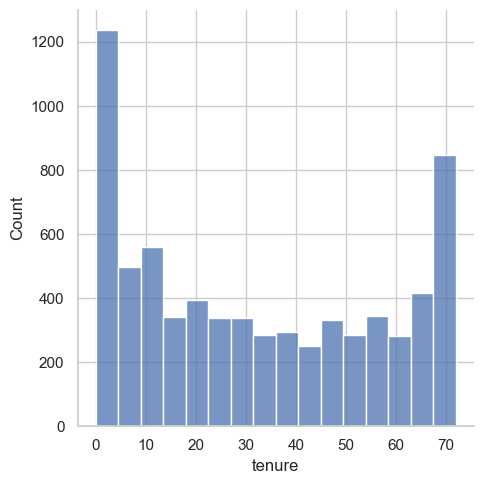

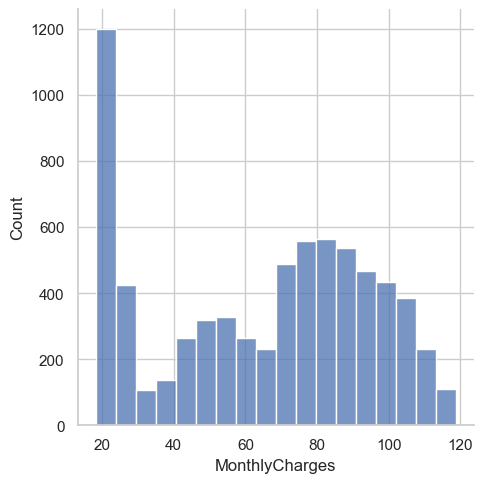

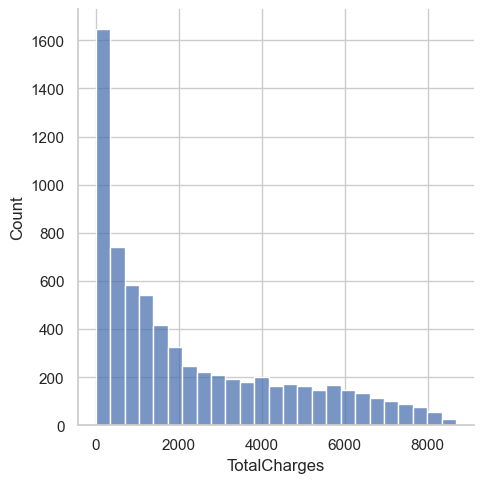

In [16]:
for cols in num_cols:
    sns.displot(data,x = cols)

In [17]:
data[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [18]:
!pip install -U imbalanced-learn

### Performing Scaling using the StandardScaler library:

In [19]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
cat_columns  = list(data.select_dtypes(include=['object']).columns)
cat_columns.remove('customerID')
cat_columns
data = pd.get_dummies(data, columns=cat_columns, drop_first=True)
data.drop("customerID",axis=1,inplace=True)
X = data.drop("Churn",axis = 1)
y = data['Churn']

### Resampling using ADASYN library:

In [20]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
X_resampled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CustFinancialStatus_Middle Class,CustFinancialStatus_Upper Class
0,0,-1.277445,-1.160323,-0.992611,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,True,False
1,0,0.066327,-0.259629,-0.172165,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
2,0,-1.236724,-0.362660,-0.958066,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0.514251,-0.746535,-0.193672,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,0,-1.236724,0.197365,-0.938874,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0,1.167455,1.467270,1.921573,False,False,False,True,False,True,...,False,True,False,True,True,True,False,False,False,True
10295,0,1.394061,1.296061,2.075238,True,True,False,True,False,True,...,False,True,False,False,True,True,False,False,False,True
10296,0,1.290608,1.174946,1.759560,False,False,False,True,False,True,...,False,True,True,False,True,True,False,False,False,True
10297,0,1.365757,1.305416,2.012078,False,False,False,True,False,True,...,False,True,False,True,True,True,False,False,False,True


## Calculating Covariance between Churn and other variables in the dataset

In [21]:
import numpy as np

covariances = {}
for column in X_resampled.columns:
    # Use .iloc to index the DataFrame correctly
    cov = np.cov(y_resampled, X_resampled[column])[0, 1]  # Extracting the covariance value
    covariances[column] = cov

# Display the covariance values
for column, cov in covariances.items():
    print(f"Covariance between Churn and {column}: {cov}")

Covariance between Churn and SeniorCitizen: 0.01294278354346237
Covariance between Churn and tenure: -0.17253779295949598
Covariance between Churn and MonthlyCharges: 0.09033437820151355
Covariance between Churn and TotalCharges: -0.0880256488632891
Covariance between Churn and gender_Male: 0.009945124747520495
Covariance between Churn and Partner_Yes: -0.028495649529448178
Covariance between Churn and Dependents_Yes: -0.029909776154808516
Covariance between Churn and PhoneService_Yes: 0.0007879191735943348
Covariance between Churn and MultipleLines_No phone service: -5.6157367804214736e-05
Covariance between Churn and MultipleLines_Yes: 0.01571272025290202
Covariance between Churn and InternetService_Fiber optic: 0.07478787629184326
Covariance between Churn and InternetService_No: -0.046667781516762236
Covariance between Churn and OnlineSecurity_No internet service: -0.046667781516762236
Covariance between Churn and OnlineSecurity_Yes: -0.02871789353826506
Covariance between Churn and

## 1. Applying Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and test datasets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the possible hyperparameters for the LogisticRegression Model
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['saga']
}

# Initialize grid search to find best possible hyperparameters for the model
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=100, solver='saga'),  # Reduced iterations for grid search
    param_grid=param_grid_lr,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model with the training data
grid_search_lr.fit(X_train, y_train)

# Find best parameters and the best score
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

# Retrieve the best model
best_lr = grid_search_lr.best_estimator_
best_lr.max_iter = 1000  # Increase iterations for the final model
best_lr.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_best_lr = best_lr.predict(X_test)

# Creating a list of classification reports and confusion matrices to compare all the models finally
classification_reports = []
confusion_matrices = []

# Append classification report and confusion matrix to comparison lists
classification_reports.append(classification_report(y_test, y_pred_best_lr))
confusion_matrices.append(confusion_matrix(y_test, y_pred_best_lr))

# Print the classification report and confusion matrix for this model
print(classification_report(y_test, y_pred_best_lr))
print(confusion_matrix(y_test, y_pred_best_lr))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\Users\axays\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 10, 'solver': 'saga'}
Best Score: 0.7844398528558777
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1036
           1       0.76      0.82      0.79      1024

    accuracy                           0.78      2060
   macro avg       0.79      0.78      0.78      2060
weighted avg       0.79      0.78      0.78      2060

[[777 259]
 [186 838]]


#### Analysis of Logistic Regression model's performance metrics:

Precision:

Class 0 (Non-Churn): The model achieved a precision of 80%, suggesting a high accuracy level in predicting non-churning customers.
Class 1 (Churn): The precision for churn predictions was slightly lower at 76%, indicating a moderate level of accuracy in identifying churning customers.

Recall:

Class 0: The recall for non-churn predictions was 75%, reflecting the model's ability to correctly identify a significant portion of non-churning customers.
Class 1: The model showed a higher recall of 81% in identifying churning customers, indicating its effectiveness in detecting potential churn cases.

F1-Score:

Class 0: The F1-score, a harmonic mean of precision and recall, was 77% for non-churn predictions, indicating a balanced performance.
Class 1: For churn predictions, the F1-score was marginally higher at 78%, suggesting a slightly better balance in predicting churn cases.

Accuracy: The overall accuracy of the model was 78%, denoting a robust performance across both classes.

Confusion Matrix Analysis:

True Negatives (TN): 775 customers were correctly identified as not at risk of churning. False Positives (FP): 261 customers were mistakenly predicted as likely to churn. False Negatives (FN): 194 customers who were actually churning were not flagged by the model. True Positives (TP): 830 churning customers were accurately identified.

### 2. Applying KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Convert Pandas DataFrames/Series to NumPy arrays
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test

# Initialize possible hyperparameters
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize grid search to get best hyperparameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Fit the model with the training data
grid_search_knn.fit(X_train_np, y_train_np)

print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

# Retrieve the best model
best_knn = grid_search_knn.best_estimator_

# Make predictions with the tuned model
y_pred_best_knn = best_knn.predict(X_test_np)

# Append classification report and confusion matrix to comparison lists
classification_reports.append(classification_report(y_test_np, y_pred_best_knn))
confusion_matrices.append(confusion_matrix(y_test_np, y_pred_best_knn))

# Print the classification report and confusion matrix for this model
print(classification_report(y_test_np, y_pred_best_knn))
print(confusion_matrix(y_test_np, y_pred_best_knn))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score: 0.7953640334588926
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1036
           1       0.73      0.93      0.82      1024

    accuracy                           0.79      2060
   macro avg       0.82      0.79      0.79      2060
weighted avg       0.82      0.79      0.79      2060

[[685 351]
 [ 73 951]]


Analysis of Performance metrics of the KNN-Classifier model
Precision:

Class 0 (Non-Churn): The model has a precision of 91%, indicating a high accuracy in predicting non-churning customers. Class 1 (Churn): The precision is 74%, showing reasonable accuracy in predicting churning customers.

Recall:

Class 0: The recall is 64%, suggesting that the model identifies 68% of all non-churning customers correctly. Class 1: A high recall of 93% indicates the model is effective in identifying churning customers.

F1-Score:

Class 0: The F1-score is 77%, reflecting a balance between precision and recall for non-churn predictions. Class 1: An F1-score of 82% shows a strong balance between precision and recall in churn predictions.

Accuracy: The overall accuracy of the model stands at 80%, representing the proportion of total predictions that were correct.

Confusion Matrix Analysis:

True Negative (TN): 700 instances where the model correctly identified non-churning customers. 
False Positive (FP): 336 instances where the model incorrectly labeled non-churning customers as churning. 
False Negative (FN): 72 instances where the model failed to identify churning customers. 
True Positive (TP): 952 instances where the model correctly identified churning customers.

### 3. a) Applying Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Hyperparameters for the Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the grid-search to find best hyperparameters
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(),     # Initialize DecisionTreeClassifier()
    param_grid=param_grid_dt,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Fit the training data
grid_search_dt.fit(X_train, y_train)

print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

# Retrieve the best model
best_dt = grid_search_dt.best_estimator_

# Make predictions with the tuned model
y_pred_best_dt = best_dt.predict(X_test)

# Append classification report and confusion matrix to comparison lists
classification_reports.append(classification_report(y_test, y_pred_best_dt))
confusion_matrices.append(confusion_matrix(y_test, y_pred_best_dt))

# Print the classification report and confusion matrix for this model
print(classification_report(y_test, y_pred_best_dt))
print(confusion_matrix(y_test, y_pred_best_dt))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7640501853915032
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1036
           1       0.74      0.77      0.76      1024

    accuracy                           0.75      2060
   macro avg       0.75      0.75      0.75      2060
weighted avg       0.75      0.75      0.75      2060

[[763 273]
 [237 787]]


#### Analysis of Decision Tree model's performance metrics:
Precision:

Class 0 (Non-Churn): The precision was 77%, indicating that when the model predicts a customer will not churn, it is correct 77% of the time. Class 1 (Churn): The model achieved a precision of 71% in predicting churn, showing reasonable accuracy.

Recall:

Class 0: The recall for non-churn predictions stood at 69%, indicating the model's capability to correctly identify close to three-quarters of the non-churning customers. Class 1: The model showed a slightly higher recall of 79% in identifying churning customers, suggesting it is slightly more effective in detecting customers who are likely to churn.

F1-Score:

Class 0: The F1-score for non-churn predictions was 72%, reflecting a balance between precision and recall. Class 1: A similar F1-score of 75% for churn predictions indicates an effective balance in this category as well.

Accuracy: The model achieved an overall accuracy of 74%, which is a solid performance but indicates potential areas for improvement.

Confusion Matrix Analysis:

True Negatives (TN): 711 customers were correctly identified as not churning. False Positives (FP): 325 customers were incorrectly labeled as at risk of churning. False Negatives (FN): 215 customers who were churning were not detected by the model. True Positives (TP): 809 churning customers were accurately identified.

#### 3.b) Decision Tree visualization

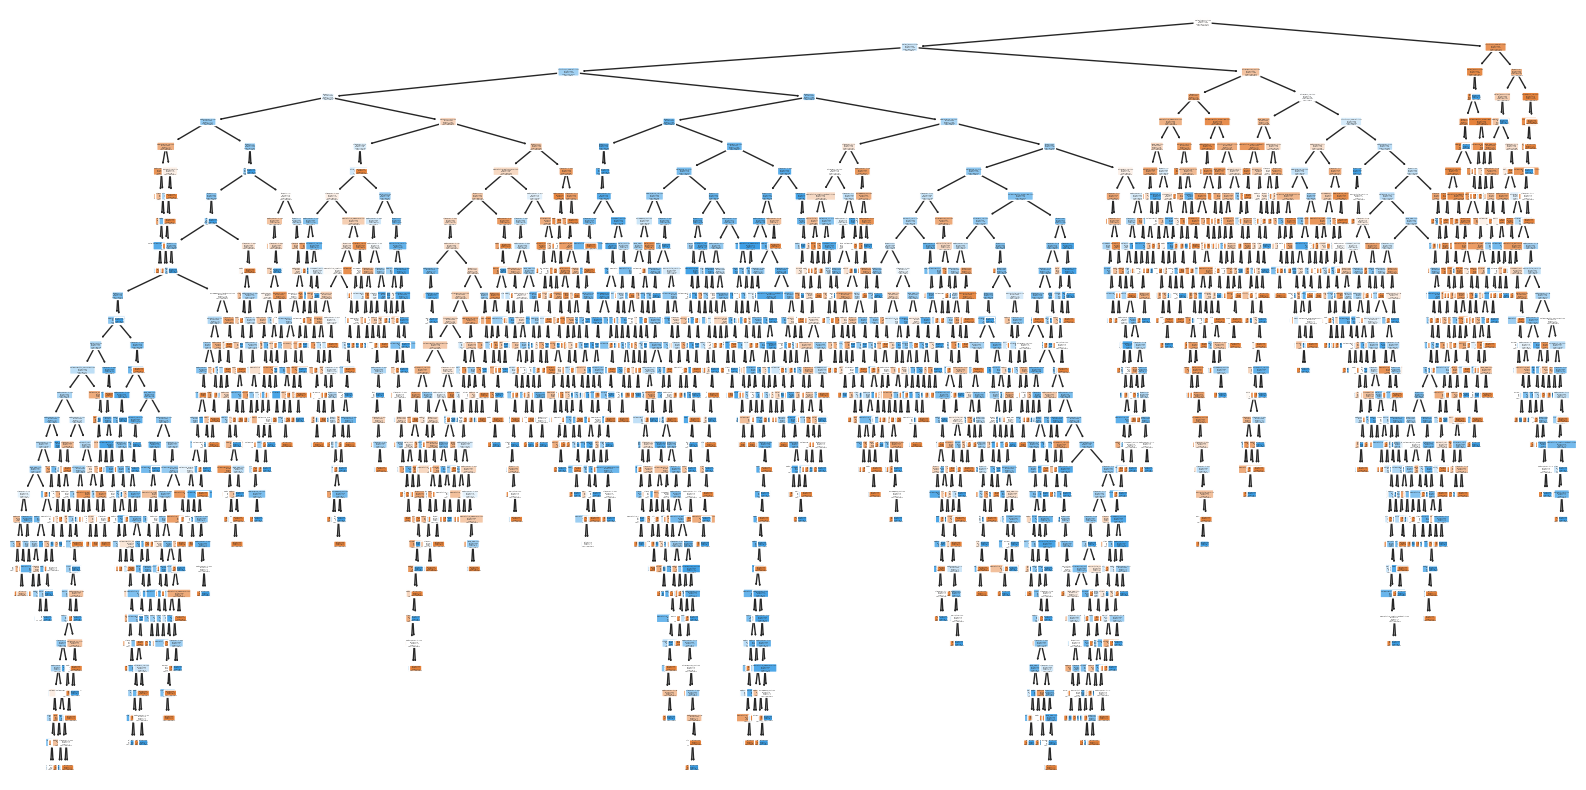

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the feature names from Index to list
feature_names_list = X_train.columns.tolist()

# Plot the best decision tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(best_dt, 
          filled=True,
          feature_names=feature_names_list,
          class_names=['Non-Churn', 'Churn'],
          rounded=True,
          proportion=False,  # Change to True to show proportions
          precision=2)

plt.show()

### 4. a) Applying Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create hyperparameters and train the Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 10]
}

# Initialize Grid search CV for the Random Forest model
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_rf,
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)    

# Retrieve the best model
best_rf = grid_search_rf.best_estimator_

# Make predictions with the tuned model
y_pred_best_rf = best_rf.predict(X_test)

# Append classification report and confusion matrix to comparison lists
classification_reports.append(classification_report(y_test, y_pred_best_rf))
confusion_matrices.append(confusion_matrix(y_test, y_pred_best_rf))

# Print the classification report and confusion matrix for this model
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7748508094597094
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1036
           1       0.73      0.82      0.77      1024

    accuracy                           0.76      2060
   macro avg       0.77      0.76      0.76      2060
weighted avg       0.77      0.76      0.76      2060

[[729 307]
 [183 841]]


Analysis of Random Forest performance metrics:
Precision:

Class 0 (Non-Churn): The model achieved a precision of 87%, indicating a high accuracy when predicting that customers will not churn. Class 1 (Churn): The precision for churn predictions was 80%, reflecting a lower but still strong accuracy in identifying actual churn cases.

Recall:

Class 0: The recall for non-churn predictions stood at 78%, showing the model's effectiveness in identifying the majority of non-churning customers. Class 1: A higher recall of 88% for churn predictions suggests the model is particularly adept at identifying customers who are likely to churn.

F1-Score:

Class 0: An F1-score of 82% for non-churn predictions indicates a good balance between precision and recall. Class 1: The F1-score for churn predictions was slightly higher at 84%, indicating a very effective balance for this class. Accuracy: The overall accuracy of the model was 83%, signifying its strong performance across both churn and non-churn predictions.

Confusion Matrix Analysis:

True Negatives (TN): 807 customers were accurately identified as not at risk of churning. False Positives (FP): 229 customers were mistakenly labeled as likely to churn. False Negatives (FN): 118 customers who were actually churning were not flagged by the model. True Positives (TP): 906 churning customers were correctly identified.

### 4. b) Calculating feature importance for the Random Forest model

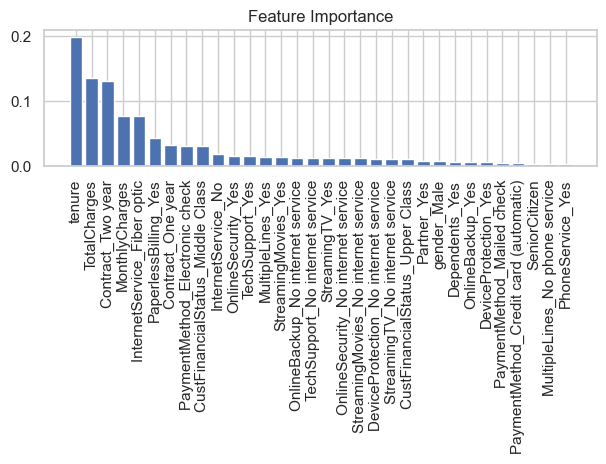

In [27]:
importances = best_rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### 5. Applying Naive Bias

In [28]:
from sklearn.naive_bayes import GaussianNB

# Parameter grid for var_smoothing
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Setting up the GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, verbose=1, scoring='accuracy')

# Fitting GridSearchCV to the training data
grid_search_nb.fit(X_train, y_train)

# Best parameter and score
print("Best Parameters:", grid_search_nb.best_params_)
print("Best Score:", grid_search_nb.best_score_)

# Retrieve the best model
best_nb = grid_search_nb.best_estimator_

# Make predictions with the tuned model
y_pred_best_nb = best_nb.predict(X_test)

# Append classification report and confusion matrix to comparison lists
classification_reports.append(classification_report(y_test, y_pred_best_nb))
confusion_matrices.append(confusion_matrix(y_test, y_pred_best_nb))

# Print the classification report and confusion matrix for this model
print(classification_report(y_test, y_pred_best_nb))
print(confusion_matrix(y_test, y_pred_best_nb))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 0.02310129700083159}
Best Score: 0.6855200099032663
              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1036
           1       0.63      0.85      0.73      1024

    accuracy                           0.68      2060
   macro avg       0.71      0.68      0.67      2060
weighted avg       0.71      0.68      0.67      2060

[[527 509]
 [149 875]]


#### Analysis of performance metrics of the Naive Bias model after Hyperparameter Tuning:
Precision:

Class 0 (Non-Churn): The precision of 77% suggests that when the model predicts non-churn, it is correct about 78% of the time. Class 1 (Churn): A lower precision of 63% for churn predictions indicates a higher rate of false positives in this category.

Recall:

Class 0: The recall for non-churn predictions is 51%, indicating that over half of the actual non-churn cases are correctly identified. Class 1: The model shows a higher recall of 85% in identifying churn cases, suggesting it is more effective at detecting customers likely to churn.

F1-Score:

Class 0: The F1-score for non-churn predictions is 62%, reflecting a balance between precision and recall. Class 1: For churn predictions, the F1-score is higher at 72%, showing a better balance in this category.

Accuracy: The overall accuracy of the model stands at 68%, which is moderate and suggests room for improvement.

Confusion Matrix Insights:

True Negatives (TN): 529 customers were correctly identified as non-churning. False Positives (FP): 507 customers were incorrectly predicted as churning. False Negatives (FN): 154 customers who were churning were not identified by the model. True Positives (TP): 870 churning customers were correctly identified.

### 6. a) Applying XG Boost

In [29]:
import xgboost as xgb

# Create hyperparameters and train the XGBoost model
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    # Add more parameters here
}

grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           parameters, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Find best parameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

# Create and train the XGBoost model with optimized hyperparameters
xgb_classifier = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss',
    learning_rate=0.1,  # Optimized learning rate
    max_depth=5,        # Optimized max depth
    n_estimators=300    # Optimized number of estimators
)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_xgb = xgb_classifier.predict(X_test)

# Append classification report and confusion matrix to comparison lists
classification_reports.append(classification_report(y_test, y_pred_xgb))
confusion_matrices.append(confusion_matrix(y_test, y_pred_xgb))

# Print the classification report and confusion matrix for this model
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1036
           1       0.79      0.86      0.82      1024

    accuracy                           0.81      2060
   macro avg       0.82      0.81      0.81      2060
weighted avg       0.82      0.81      0.81      2060

[[796 240]
 [145 879]]


#### Explanation of XGBoost model (before Hyperparameter tuning) results

Precision:
Class 0 (Non-Churn): The precision is 85%. This means that when the model predicts a customer will not churn, it is correct 85% of the time. Class 1 (Churn): The precision is 78%. This indicates that the model is correct 78% of the time when predicting that a customer will churn.

Recall:
Class 0: The recall is 76%, suggesting that the model correctly identifies 76% of the non-churning customers. Class 1: The recall for churn predictions is higher at 86%, showing that the model identifies 86% of the actual churning customers correctly.

Accuracy: The overall accuracy of the model is 81%, indicating a high level of correctness across both classes.

F1-Score:
Class 0: The F1-score is 80%, which is a balance between precision and recall for predictions of non-churn. Class 1: Similarly, the F1-score for churn predictions is 82%. 

Confusion Matrix:

The model predicted 790 true negatives (correct non-churn predictions) and 880 true positives (correct churn predictions). However, there were 246 false positives (non-churn customers incorrectly labeled as churn) and 144 false negatives (churn customers incorrectly labeled as non-churn).

### 6. b) Feature importance of the XGBoost model

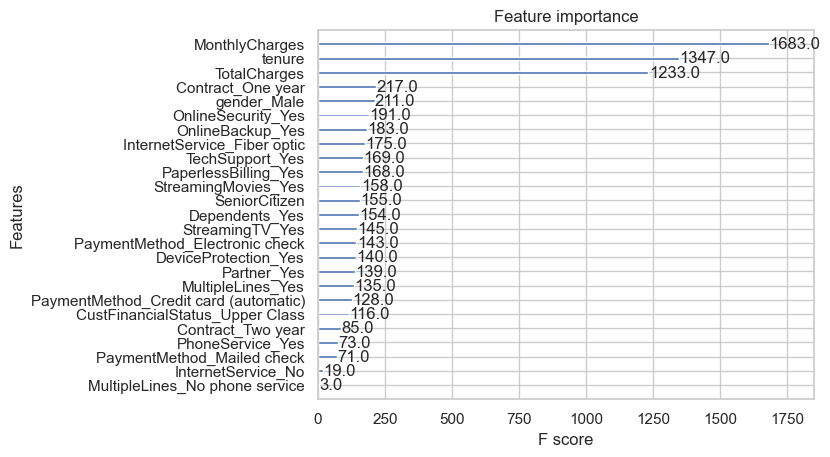

In [30]:
xgb.plot_importance(xgb_classifier)
plt.show()

### 7. Comparing all the ML Models applied so far with their Accuracies and F1-Scores for Class-1 (Churning customers)

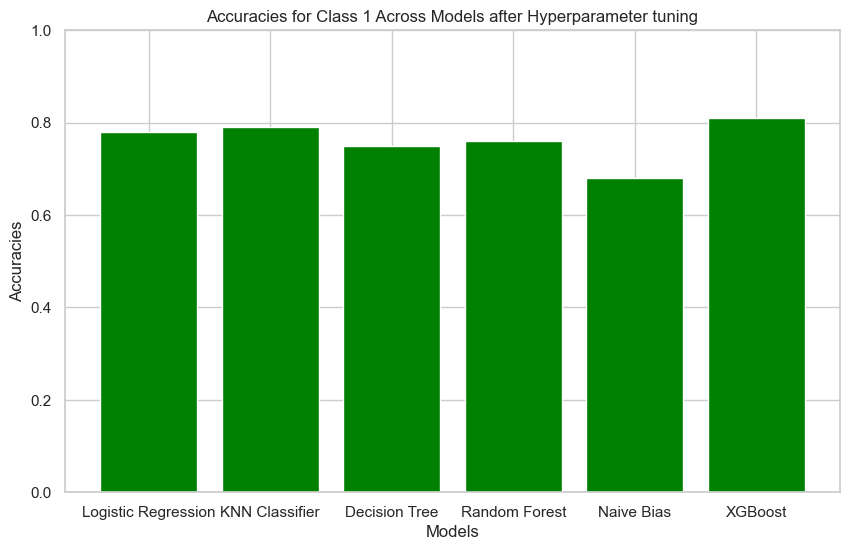

In [31]:
# Parsing the accuracies
accuracies = []
for report in classification_reports:
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            accuracy = float(line.strip().split()[1])
            accuracies.append(accuracy)
            break


# For adding model names to visualization in X-axis
model_names = ['Logistic Regression', 'KNN Classifier', 'Decision Tree', 'Random Forest', 'Naive Bias', 'XGBoost']

# Plot for accuracies across all models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Accuracies for Class 1 Across Models after Hyperparameter tuning')
plt.ylim(0, 1)
plt.show()

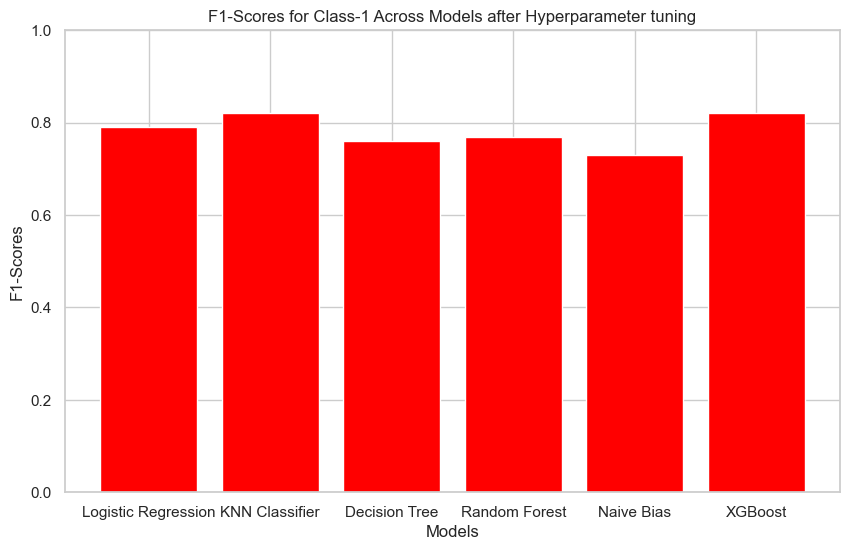

In [32]:
# Parsing the F1-scores for class 1
f1_scores_class_1 = []
for report in classification_reports:
    lines = report.split('\n')
    for line in lines:
        if line.startswith('           1'):
            f1_score_class_1 = float(line.strip().split()[3])
            f1_scores_class_1.append(f1_score_class_1)
            break

# Plot for F1-scores for Class-1
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores_class_1, color='red')
plt.xlabel('Models')
plt.ylabel('F1-Scores')
plt.title('F1-Scores for Class-1 Across Models after Hyperparameter tuning')
plt.ylim(0, 1)  # F1-score ranges from 0 to 1
plt.show()